In [1]:
%run notebook_setup.py

In [2]:
sys.path.append('../..')

In [3]:
from standardiser import rules, neutralise

from standardiser.rules_demo import rules_table, show_change

In [4]:
rules.logger.setLevel('DEBUG')

In [5]:
# Add rules that are to be used with caution...

rules.add_rule_set('to_be_used_with_caution')

# **`rules`**: run structure-normalisation transformations

This document describes the **`rules`** module, which encodes a set of rules that are applied in order to standardise molecular representation.

### Notes

Some notes on various aspects of the rules are available...

* Some information about how the rules are applied is provided [here](Rule_application_strategy.ipynb).


* A brief note on how the charge-neutralisation strategy relates to the rules given is [here](Neutralisation_strategy.ipynb).


* It is importaint to remember that the product of the application of the rules is not claimed to be a canonical tautomer: there may be cases where different input tautomers will produce different outputs, and it is currently up to the user to track this if it is important. This issue is discussed further [here](Multiple_possible_tautomers.ipynb).


* There a certain cases where rules are available that are not enabled by default. For example, in certain hydroxy-substituted heterocycles, a (non-intuitive) nonaromatic carbonyl is favoured over the aromatic hydroxy form. This particular issue is is discussed further [here](Tautomerism_and_aromaticity.ipynb).


* A brief note on dealing with odd structures [here](Sanity_Checking.ipynb).


* Documents on specific type of rule are linked in the appropriate section.

### Further work

I would be interested in missing rules, and in cases where rules need to be restricted (_i.e._ they are being applied inappropriately in some cases). I have attempted to highlight some cases where this might be an issue, in order to prompt discussion.


### Usage

The `rules` module is used in the same manner as the other modules...

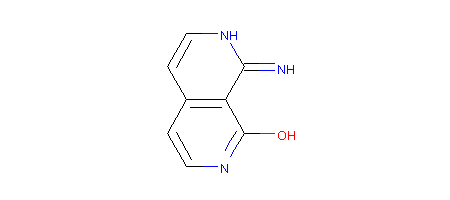

In [6]:
mol = Chem.MolFromSmiles("Oc1nccc2cc[nH]c(=N)c12")

mol

[11/07/16 15:31:33 standardiser.rules DEBUG] mol = 'N=c1[nH]ccc2ccnc(O)c12'
[11/07/16 15:31:33 standardiser.rules DEBUG] starting pass 1...
[11/07/16 15:31:33 standardiser.rules DEBUG] Trying rule 1 'hydroxy imine -> carboxamide' on pass 1...
[11/07/16 15:31:33 standardiser.rules DEBUG] Trying rule 2 '2-hydroxy pyridine -> 2-pyridone' on pass 1...
[11/07/16 15:31:33 standardiser.rules DEBUG] rule 2 '2-hydroxy pyridine -> 2-pyridone' applied on pass 1
[11/07/16 15:31:33 standardiser.rules DEBUG] Trying rule 3 '4-hydroxy pyridine -> 4-pyridone (within-ring)' on pass 1...
[11/07/16 15:31:33 standardiser.rules DEBUG] Trying rule 4 '4-pyrimidone -> 2-pyrimidone (any)' on pass 1...
[11/07/16 15:31:33 standardiser.rules DEBUG] Trying rule 5 'hydropyridin-2-imine -> 2-amino-pyridine' on pass 1...
[11/07/16 15:31:33 standardiser.rules DEBUG] rule 5 'hydropyridin-2-imine -> 2-amino-pyridine' applied on pass 1
[11/07/16 15:31:33 standardiser.rules DEBUG] Trying rule 6 'hydropyridin-2-imine -> 2-a

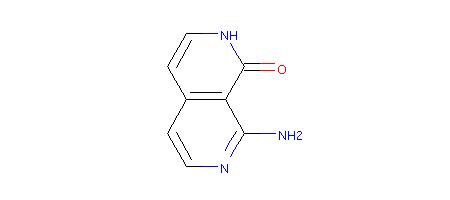

In [7]:
rules.run(mol)

<p><a name="top"></a></p>
## Decription of the rules

For reference, the SMARTS implementing the rules are shown below.

Note that RDKit reaction SMARTS offer a certain amount of flexibility as to how one codes them up. For example, I prefer to use an asterisk on the product side where atoms don't change to emphasise those that do. I'd be interested if there are an issues with this approach that I'm unaware of.

In [8]:
HTML(rules_table())

<p><a name="Heteroatom_H-shift"></a></p>
## Heteroatom H-shifts

These rules deal with relatively straigntforward shifts of protons between heteroatoms.

Note that aza-derivatives of the illustrated species are also affected.

<p><a name="hydroxy_imine_-_carboxamide"></a></p>
### hydroxy imine -> carboxamide

In [9]:
HTML(show_change("OC(C)=NC"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 1 'hydroxy imine -> carboxamide' applied


[<a href="#top">Top</a>]

<p><a name="2-hydroxy_pyridine_-_2-pyridone"></a></p>
### 2-hydroxy pyridine -> 2-pyridone

The hydroxy-pyrimidine input is used here to show that the 2-pyrimidone that is produced preferentially and not the 4-pyrimidone.

In [10]:
HTML(show_change("Oc1ncncc1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 2 '2-hydroxy pyridine -> 2-pyridone' applied


[<a href="#top">Top</a>]

Note that 2-hydroxy-imidazole is also affected...

In [11]:
HTML(show_change("Oc1ncc[nH]1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 2 '2-hydroxy pyridine -> 2-pyridone' applied


[<a href="#top">Top</a>]

<p><a name="4-hydroxy_pyridine_-_4-pyridone_within-ring"></a></p>
### 4-hydroxy pyridine -> 4-pyridone (within-ring)

This more restrictive 'within-ring' rule was introduced as the more general '[4-hydroxy pyridine -> 4-pyridone (any)](#4-hydroxy_pyridine_-_4-pyridone_any)' (see below) rule alone can produce some unexpected effects in some circumstances; see the document [here](Hydroxy_pyridine_within_ring.ipynb) for more details.

In [12]:
HTML(show_change("Oc1ccncc1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 3 '4-hydroxy pyridine -> 4-pyridone (within-ring)' applied


[<a href="#top">Top</a>]

<p><a name="4-hydroxy_pyridine_-_4-pyridone_any"></a></p>
### 4-hydroxy pyridine -> 4-pyridone (any)

This more general version of the rule above will work 'across rings', which may or may not be desirable.

__This rule should be used with caution.__

In [13]:
HTML(show_change("Oc1cccc2ccncc12"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 1 '4-hydroxy pyridine -> 4-pyridone (any)' applied


Note that 5-membered heterocycles can also be affected  by this rule...

In [14]:
HTML(show_change("Oc1n(C)ncc1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 1 '4-hydroxy pyridine -> 4-pyridone (any)' applied


[<a href="#top">Top</a>]

<p><a name="4-pyrimidone_-_2-pyrimidone_any"></a></p>
### 4-pyrimidone -> 2-pyrimidone (any)


In [15]:
HTML(show_change("O=c1nc[nH]cc1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 4 '4-pyrimidone -> 2-pyrimidone (any)' applied


Note that this rule will work 'across-rings', as illustrated below.

If this is not considered appropriate, a more restricted version on the rule that only works 'within-rings' could be enabled instead.

In [16]:
HTML(show_change("O=c1nc2[nH]ccn2cc1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 4 '4-pyrimidone -> 2-pyrimidone (any)' applied


[<a href="#top">Top</a>]

### hydropyridin-2-imine -> 2-amino-pyridine
<p><a name="hydropyridin-2-imine_-_2-amino-pyridine"></a></p>

In [17]:
HTML(show_change("N=c1[nH]cncc1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 5 'hydropyridin-2-imine -> 2-amino-pyridine' applied


Note that the five-membered analogues such as that show below will also be affected...

In [18]:
HTML(show_change("N=c1[nH]ccn(C)1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 5 'hydropyridin-2-imine -> 2-amino-pyridine' applied


<p><a name="hydropyridin-2-imine_-_2-amino-pyridine_N-subst"></a></p>
### hydropyridin-2-imine -> 2-amino-pyridine (N-subst.)

This is the N-substituted analogue of the rule above; a seperate rule is necessary as otherwise incorrect structures can result.

In [19]:
HTML(show_change("CN=c1[nH]cncc1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 6 'hydropyridin-2-imine -> 2-amino-pyridine (N-subst.)' applied


[<a href="#top">Top</a>]

<p><a name="hydropyridin-4-imine_-_4-amino-pyridine"></a></p>
### hydropyridin-4-imine -> 4-amino-pyridine


In [20]:
HTML(show_change("N=c1nc[nH]cc1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 7 'hydropyridin-4-imine -> 4-amino-pyridine' applied


Note that, as with the analagous/reverse '[4-hydroxy pyridine -> 4-pyridone (any)](#4-hydroxy_pyridine_-_4-pyridone_any)' rule, this one may also work 'across rings'...

In [21]:
HTML(show_change("N=c(c1)ccn2cc[nH]c12"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 7 'hydropyridin-4-imine -> 4-amino-pyridine' applied


Note that there is no 'within-ring' analogue of this rule (or of the [substituted analogy](#hydropyridin-4-imine_-_4-amino-pyridine_N-subst) variant) yet, as I have not come across a case where this general version causes problems; however, it would be straightforward to create _e.g._ 'within-ring' and 'any' variants if necessary.

<p><a name="hydropyridin-4-imine_-_4-amino-pyridine_N-subst"></a></p>
### hydropyridin-4-imine -> 4-amino-pyridine (N-subst.)

This is the N-substituted analogue of the rule above; a seperate rule is necessary as otherwise incorrect structures can result.

In [22]:
HTML(show_change("CN=c1nc[nH]cc1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 8 'hydropyridin-4-imine -> 4-amino-pyridine (N-subst.)' applied


[<a href="#top">Top</a>]

<p><a name="Heterocyclic_tautomers"></a></p>
## Heterocyclic tautomers

The following rules address incorrect protonation of some bicyclic heterocycles.

<p><a name="Fix_heterocyclic_tautomer_1"></a></p>
### Fix heterocyclic tautomer 1


In [23]:
HTML(show_change("n1ccc2ccc[nH]c12"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 9 'Fix heterocyclic tautomer 1' applied


Note that polycyclic pyridones and pyrimidones should _not_ be affected by these rules, _i.e._ the proton should remain on the six-membered ring...

[11/07/16 15:31:33 standardiser.rules DEBUG] mol = 'O=c1ccn2ccnc2[nH]1'
[11/07/16 15:31:33 standardiser.rules DEBUG] starting pass 1...
[11/07/16 15:31:33 standardiser.rules DEBUG] Trying rule 1 'hydroxy imine -> carboxamide' on pass 1...
[11/07/16 15:31:33 standardiser.rules DEBUG] Trying rule 2 '2-hydroxy pyridine -> 2-pyridone' on pass 1...
[11/07/16 15:31:33 standardiser.rules DEBUG] Trying rule 3 '4-hydroxy pyridine -> 4-pyridone (within-ring)' on pass 1...
[11/07/16 15:31:33 standardiser.rules DEBUG] Trying rule 4 '4-pyrimidone -> 2-pyrimidone (any)' on pass 1...
[11/07/16 15:31:33 standardiser.rules DEBUG] Trying rule 5 'hydropyridin-2-imine -> 2-amino-pyridine' on pass 1...
[11/07/16 15:31:33 standardiser.rules DEBUG] Trying rule 6 'hydropyridin-2-imine -> 2-amino-pyridine (N-subst.)' on pass 1...
[11/07/16 15:31:33 standardiser.rules DEBUG] Trying rule 7 'hydropyridin-4-imine -> 4-amino-pyridine' on pass 1...
[11/07/16 15:31:33 standardiser.rules DEBUG] Trying rule 8 'hydropyr

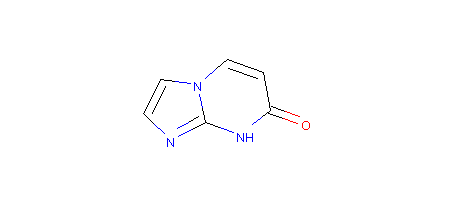

In [24]:
rules.run(Chem.MolFromSmiles("c1cc(=O)[nH]c2nccn12"))

In [25]:
HTML(show_change("c1cc(=O)[nH]c2nccn12"))

[11/07/16 15:31:33 standardiser.rules WARNING] No hits for mol!


[<a href="#top">Top</a>]

<p><a name="Fix_heterocyclic_tautomer_2"></a></p>
### Fix heterocyclic tautomer 2


In [26]:
HTML(show_change("c1cnc2c[nH]ccc12"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 10 'Fix heterocyclic tautomer 2' applied


[<a href="#top">Top</a>]

<p><a name="Fix_heterocyclic_tautomer_3"></a></p>
### Fix heterocyclic tautomer 3


In [27]:
HTML(show_change("n1ccc2c[nH]ccc12"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 11 'Fix heterocyclic tautomer 3' applied


[<a href="#top">Top</a>]

<p><a name="Fix_heterocyclic_tautomer_4"></a></p>
### Fix heterocyclic tautomer 4


In [28]:
HTML(show_change("c1cnc2ccc[nH]c12"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 12 'Fix heterocyclic tautomer 4' applied


[<a href="#top">Top</a>]

<p><a name="Enol_-_Ketone"></a></p>
### Enol -> Ketone

This rule appears straightforward, but raises certain issues which are discussed [here](Keto-enol_tautomerism.ipynb).

In [29]:
HTML(show_change("OC(C)=C(C)C"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 13 'Enol -> Ketone' applied


[<a href="#top">Top</a>]

<p><a name="Charge-seperated_systems"></a></p>
## Charge-seperated systems

The following rules address cases in which positive and negative formal charges are in conjugation, and the molecule can be neutralised _via_ successive rearrangement of adjacent double and single bonds.

There are certain issues with these rules systems which are discusssed in the document available [here](Charge-separated_systems.ipynb).

<p><a name="Fix_1_3_charge-seperated_systems_non-aromatic"></a></p>
### Fix 1,3 charge-seperated systems (non-aromatic)


In [30]:
HTML(show_change("C[N-]C(C)=[N+](C)C"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 14 'Fix 1,3 charge-seperated systems (non-aromatic)' applied


Note that cases where the terminal negatively-charged atom is part of _e.g._ an N-oxide will not now be touched. This modification was motivated by molecules such as [CHEMBL8248](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL8248), where application of the basic rule was undesirable.

[<a href="#top">Top</a>]

<p><a name="Fix_1_3_charge-seperated_systems_aromatic_1"></a></p>
### Fix 1,3 charge-seperated systems (aromatic 1)


In [31]:
HTML(show_change("[n-]1c(=[N+](C)C)cccc1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 15 'Fix 1,3 charge-seperated systems (aromatic 1)' applied


[<a href="#top">Top</a>]

<p><a name="Fix_1_3_charge-seperated_systems_aromatic_2"></a></p>
### Fix 1,3 charge-seperated systems (aromatic 2)

Note that it is not clear here whether, when the starting structure contains an amide anion, that the uncharged imine produced is more or less desirable that the original zwitterion or even than the cationic methyl-pyridine that would be produced by protonation of the amide anion.

In [32]:
HTML(show_change("C[n+]1c([N-](C))cccc1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 16 'Fix 1,3 charge-seperated systems (aromatic 2)' applied


Note that the anionic atom may also be an oxygen, [CHEMBL1985737](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL1985737), being an example where this rule is applied. In this case, the pyrimidone is the desired product and the question about the suitability of the rule do not apply...

In [33]:
HTML(show_change("[O-]c1[n+](C)cccc1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 16 'Fix 1,3 charge-seperated systems (aromatic 2)' applied


[<a href="#top">Top</a>]

<p><a name="Fix_1_5_charge-seperated_systems_non-aromatic"></a></p>
### Fix 1,5 charge-seperated systems (non-aromatic)


In [34]:
HTML(show_change("C[N-]C=CC=[N+](C)C"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 17 'Fix 1,5 charge-seperated systems (non-aromatic)' applied


Note that cases where the terminal negatively-charged atom is part of _e.g._ an N-oxide will not now be touched. This modification was motivated by molecules such as [CHEMBL1186335](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL1186335), where application of the basic rule was undesirable.

[<a href="#top">Top</a>]

<p><a name="Fix_1_5_charge-seperated_systems_aromatic_1"></a></p>
### Fix 1,5 charge-seperated systems (aromatic 1)


In [35]:
HTML(show_change("[n-]1ccc(=[N+](C)C)cc1"))

[11/07/16 15:31:33 standardiser.rules DEBUG] rule 18 'Fix 1,5 charge-seperated systems (aromatic 1)' applied


[<a href="#top">Top</a>]

<p><a name="Fix_1_5_charge-seperated_systems_aromatic_2"></a></p>
### Fix 1,5 charge-seperated systems (aromatic 2)

Note that it is not clear here whether the uncharged imine produced is more or less desirable that the original zwitterion or even than the cationic methyl-pyridine that would be produced by protonation of the amide anion.

In [36]:
HTML(show_change("C[n+]1ccc([N-]C)cc1"))

[11/07/16 15:31:34 standardiser.rules DEBUG] rule 19 'Fix 1,5 charge-seperated systems (aromatic 2)' applied


[<a href="#top">Top</a>]

<p><a name="Conjugated_cations"></a></p>
## Conjugated cations

This set of rules affects molecules where a non-protonated atom bearing a positive charge (most commonly a quaternary nitrogen) is conjugated with a neutral nitrogen bearing a hydrogen atom.

There are certain issues with these rules systems which are discusssed in the document available [here](Conjugated_cations_and_charge_neutralisation.ipynb).

<p><a name="Fix_1_3_conjugated_cation_non-aromatic"></a></p>
### Fix 1,3 conjugated cation (non-aromatic)


In [37]:
HTML(show_change("CNC=[N+](C)C"))

[11/07/16 15:31:34 standardiser.rules DEBUG] rule 20 'Fix 1,3 conjugated cation (non-aromatic)' applied


[<a href="#top">Top</a>]

<p><a name="Fix_1_3_conjugated_cation_aromatic_1"></a></p>
### Fix 1,3 conjugated cation (aromatic 1)


In [38]:
HTML(show_change("[nH]1c(=[N+](C)C)cccc1"))

[11/07/16 15:31:34 standardiser.rules DEBUG] rule 21 'Fix 1,3 conjugated cation (aromatic 1)' applied


[<a href="#top">Top</a>]

<p><a name="Fix_1_3_conjugated_cation_aromatic_2"></a></p>
### Fix 1,3 conjugated cation (aromatic 2)

Note that this rule leads to an iminium-containing species, which is likely to be less aromatic than the original molecule.

__This rule should be used with caution.__

In [39]:
HTML(show_change("CNc1[n+](C)cccc1"))

[11/07/16 15:31:34 standardiser.rules DEBUG] rule 2 'Fix 1,3 conjugated cation (aromatic 2)' applied


[<a href="#top">Top</a>]

Note that this also applies to five-membered heterocycles...

In [40]:
HTML(show_change("CNc1[n+](C)cco1"))

[11/07/16 15:31:34 standardiser.rules DEBUG] rule 2 'Fix 1,3 conjugated cation (aromatic 2)' applied


[<a href="#top">Top</a>]

<p><a name="Fix_1_5_conjugated_cation_non-aromatic"></a></p>
### Fix 1,5 conjugated cation (non-aromatic)


In [41]:
HTML(show_change("CNC=CC=[N+](C)C"))

[11/07/16 15:31:34 standardiser.rules DEBUG] rule 22 'Fix 1,5 conjugated cation (non-aromatic)' applied


[<a href="#top">Top</a>]

<p><a name="Fix_1_5_conjugated_cation_aromatic_1"></a></p>
### Fix 1,5 conjugated cation (aromatic 1)


In [42]:
HTML(show_change("[nH]1ccc(=[N+](C)C)cc1"))

[11/07/16 15:31:34 standardiser.rules DEBUG] rule 23 'Fix 1,5 conjugated cation (aromatic 1)' applied


[<a href="#top">Top</a>]

<p><a name="Fix_1_5_conjugated_cation_aromatic_2"></a></p>
### Fix 1,5 conjugated cation (aromatic 2)

Note that this rule leads to an iminium-containing species, which is likely to be less aromatic than the original molecule.

__This rule should be used with caution.__

In [43]:
HTML(show_change("CNc1cc[n+](C)cc1"))

[11/07/16 15:31:34 standardiser.rules DEBUG] rule 3 'Fix 1,5 conjugated cation (aromatic 2)' applied


[<a href="#top">Top</a>]

<p><a name="Fix_1_5_conjugated_cation_aromatic_3"></a></p>
### Fix 1,5 conjugated cation (aromatic 3)

Note that this rule leads to an iminium-containing species, which will be deprotonated by the neutraliser.

This is another case where such an aggressive deprotonation might be problematic, especially if there is was a anionic group also present in the molecule or there was an anionic counterion originally present.

__This rule should be used with caution.__

In [44]:
HTML(show_change("C[n+]1ccc2[nH]ccc2c1"))

[11/07/16 15:31:34 standardiser.rules DEBUG] rule 4 'Fix 1,5 conjugated cation (aromatic 3)' applied


As an aside, note that, while RDKit considers the original molecule to be fully aromatic, and still considers the outer, nine-membered cycle in the product to be aromatic, the ring fusion bond in the product is NOT considered aromatic...

In [45]:
mol = Chem.MolFromSmiles("C[n+]1ccc2[nH]ccc2c1")

Chem.MolToSmiles(mol), Chem.MolToSmiles(rules.run(mol))

[11/07/16 15:31:34 standardiser.rules DEBUG] mol = 'C[n+]1ccc2[nH]ccc2c1'
[11/07/16 15:31:34 standardiser.rules DEBUG] starting pass 1...
[11/07/16 15:31:34 standardiser.rules DEBUG] Trying rule 1 'hydroxy imine -> carboxamide' on pass 1...
[11/07/16 15:31:34 standardiser.rules DEBUG] Trying rule 2 '2-hydroxy pyridine -> 2-pyridone' on pass 1...
[11/07/16 15:31:34 standardiser.rules DEBUG] Trying rule 3 '4-hydroxy pyridine -> 4-pyridone (within-ring)' on pass 1...
[11/07/16 15:31:34 standardiser.rules DEBUG] Trying rule 4 '4-pyrimidone -> 2-pyrimidone (any)' on pass 1...
[11/07/16 15:31:34 standardiser.rules DEBUG] Trying rule 5 'hydropyridin-2-imine -> 2-amino-pyridine' on pass 1...
[11/07/16 15:31:34 standardiser.rules DEBUG] Trying rule 6 'hydropyridin-2-imine -> 2-amino-pyridine (N-subst.)' on pass 1...
[11/07/16 15:31:34 standardiser.rules DEBUG] Trying rule 7 'hydropyridin-4-imine -> 4-amino-pyridine' on pass 1...
[11/07/16 15:31:34 standardiser.rules DEBUG] Trying rule 8 'hydrop

('C[n+]1ccc2[nH]ccc2c1', 'Cn1ccc2[nH+]ccc-2c1')

Note also, that, whilst this example works as expected, a related case that fails is illustrated [here](Miscellaeny.ipynb#Fix_1_5_conjugated_cation_aromatic_3).

[<a href="#top">Top</a>]

## Miscellaneous

Other standardisations.

<p><a name="Charge-seperate_sulphoxides"></a></p>
### Charge-seperate sulphoxides

The motivation for this rule is that the charge-seperated representation is consistent with that for five-valent N (which is actually applied by default by RDKit on building such molecules) and also that it better reflects the sulphur's 'tetrahedral' (and possibly chiral) geometry. Note that, by contrast, the default representation for a sulphone in ChEMBL is in the hypervalent form, i.e. R-S(=O)(=O)-R.

Question: is this treatment of sulphoxides desirable in the current context? It might well be so in a compound-registration context, but might be inappropriate in a modelling situation.

In [46]:
HTML(show_change("CS(=O)C"))

[11/07/16 15:31:34 standardiser.rules DEBUG] rule 24 'Charge-seperate sulphoxides' applied


_N.B._ RDKit charge-seperates nitro- and n-oxides _etc._ automatically, thus no rules are needed for these

[<a href="#top">Top</a>]

<p><a name="Un-charge-seperate_sulphones"></a></p>
### Un-charge-seperate sulphones


In [47]:
HTML(show_change("C[S+2]([O-])([O-])C"))

[11/07/16 15:31:34 standardiser.rules DEBUG] rule 25 'Un-charge-seperate sulphones' applied


[<a href="#top">Top</a>]

<p><a name="hydroxy_imine_-_carboxamide"></a></p>
### Fix hydrazine-diazonium system

Borrowed from the InChI standardisation procedure, and probably not the most widely-used of the rules...

In [48]:
HTML(show_change("CNNC[N+]#N"))

[11/07/16 15:31:34 standardiser.rules DEBUG] rule 26 'Fix hydrazine-diazonium system' applied


[<a href="#top">Top</a>]